In [11]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample

In [2]:
# Load the dataset
file_path = 'bank-full.csv'
data = pd.read_csv(file_path, delimiter=';')

In [3]:
# Data Preprocessing

# Check for missing values
print(data.isnull().sum())

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


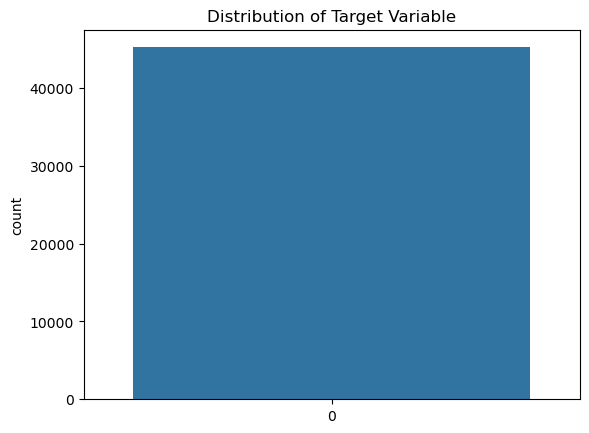

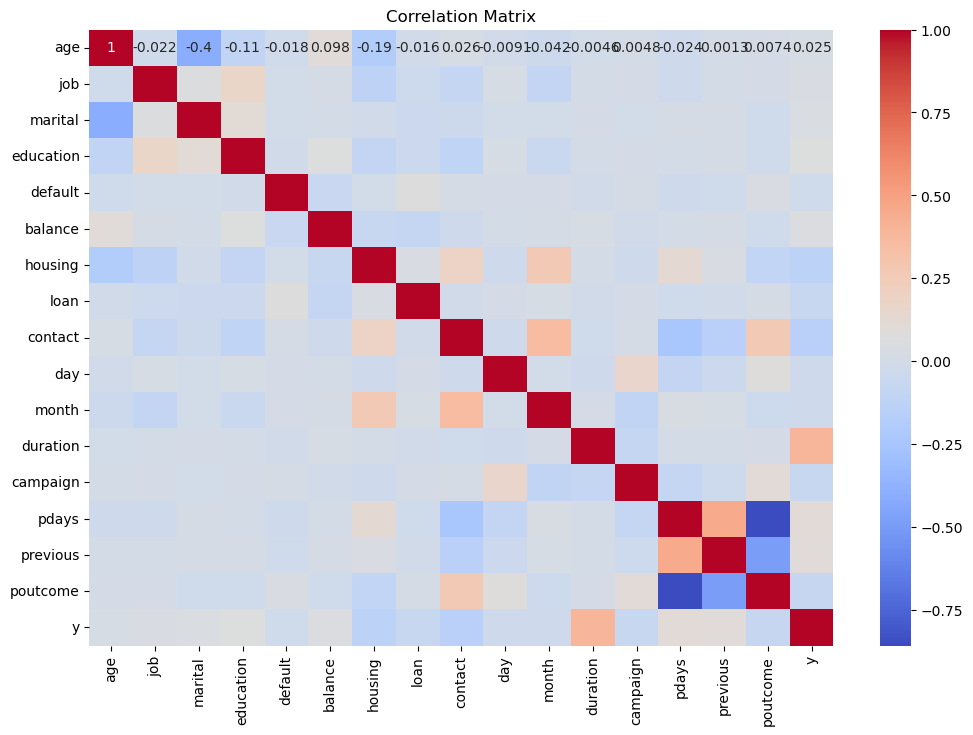

In [4]:
# Exploratory Data Analysis (EDA)

# Plot the distribution of the target variable
sns.countplot(data['y'])
plt.title('Distribution of Target Variable')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handle class imbalance by upsampling the minority class
df_majority = data[data.y == 0]
df_minority = data[data.y == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

data_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [6]:
# Split the data into features and target
X = data_upsampled.drop('y', axis=1)
y = data_upsampled['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build and Train the Model

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.9616757467593462
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      7922
           1       0.93      1.00      0.96      8047

    accuracy                           0.96     15969
   macro avg       0.96      0.96      0.96     15969
weighted avg       0.96      0.96      0.96     15969



In [9]:
# Prediction on new data

# Example new data (use the same format as the training data)
new_data = pd.DataFrame({
    'age': [30, 40],
    'job': ['blue-collar', 'entrepreneur'],
    'marital': ['married', 'single'],
    'education': ['secondary', 'tertiary'],
    'default': ['no', 'no'],
    'balance': [1000, 1500],
    'housing': ['yes', 'no'],
    'loan': ['no', 'yes'],
    'contact': ['cellular', 'telephone'],
    'day': [10, 15],
    'month': ['may', 'jun'],
    'duration': [120, 180],
    'campaign': [2, 1],
    'pdays': [100, -1],
    'previous': [2, 0],
    'poutcome': ['success', 'failure']
})

# Encode the new data
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = label_encoders[column].transform(new_data[column])

# Predict
predictions = clf.predict(new_data)
predictions = label_encoders['y'].inverse_transform(predictions)
print('Predictions for new data:', predictions)

Predictions for new data: ['no' 'no']
